# Basketball Recognition Project

In [ ]:
import os
import glob

import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras.preprocessing.image as ppimg
import tensorflow_datasets as tfds

from PIL import Image, UnidentifiedImageError

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict


# Practice - 4 photos

In [ ]:
# Not playing with fire anymore - we start simple. Still using the Keras library so still quite advanced.

# Example using the lil_test dataset

img_path = '/Users/one_above_all/PycharmProjects/Machine Learning/'
# print(os.listdir(img_path))

photos, labels = [], []
    
for img in glob.glob(img_path + 'black/*'):
    photo = ppimg.load_img(img, target_size=(200, 200))
    photo = ppimg.img_to_array(photo)
    photos.append(photo)
    labels.append('0')
    
for img in glob.glob(img_path + 'white/*'):
    photo = ppimg.load_img(img, target_size=(200, 200))
    photo = ppimg.img_to_array(photo)
    photos.append(photo)
    labels.append('1')
    
photos = np.asarray(photos).astype(int)
labels = np.asarray(labels).astype(int)

X, y = photos, labels

In [ ]:
data = X[3]

In [ ]:

plt.imshow(data, interpolation="nearest")


# Real Project

In [4]:
# Uploading the images with PIL

img_path = 'bball_dataset/'

bball_photos, bball_labels = [], []

for img in glob.glob(img_path + 'bball/*'):
    photo = ppimg.load_img(img, target_size=(200,200))
    photo = ppimg.img_to_array(photo)
    bball_photos.append(photo)
    bball_labels.append(0)
    
for img in glob.glob(img_path + 'non-bball/*'):
    photo = ppimg.load_img(img, target_size=(200,200))
    photo = ppimg.img_to_array(photo)
    bball_photos.append(photo)
    bball_labels.append(1)
    
bball_photos = np.asarray(bball_photos).astype(int)
bball_labels = np.asarray(bball_labels).astype(int)

print(bball_photos.shape, bball_labels.shape)

np.save('photos_new.npy', bball_photos)
np.save('labels_new.npy', bball_labels)

/Users/one_above_all/Machine Learning/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/one_above_all/Machine Learning/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(5786, 200, 200, 3) (5786,)


In [5]:
# Splitting train,test sets

X, y = bball_photos, bball_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [6]:
# Reshaping to make it work

X_train = X_train.reshape(4628, 200*200*3)
X_test = X_test.reshape(1158, 200*200*3)

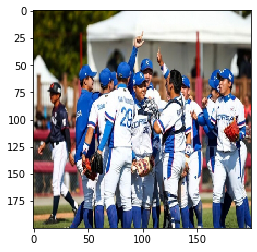

In [7]:
# Testing instances

random_int = 999

an_image = X_train[random_int]

plt.imshow(an_image.reshape(200, 200, 3), interpolation='nearest')

In [8]:
# SGD

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=24)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=24)

In [9]:
print(y_train[random_int])

sgd_clf.predict([an_image])


1


array([1])

In [10]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.81723914, 0.80751782, 0.82036316])

In [11]:
# Scores

from sklearn.metrics import precision_score, recall_score

sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

print(precision_score(y_train, sgd_pred))
print(recall_score(y_train, sgd_pred))

0.863784665579119
0.8994903737259343


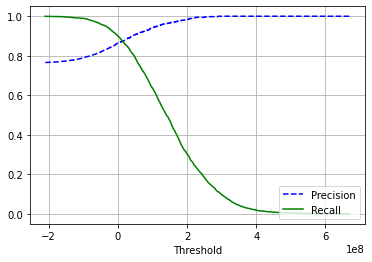

In [12]:
# PRT Curve

from sklearn.metrics import precision_recall_curve

sgd_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, sgd_scores)

def plotPrecisionRecallVSThreshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # Blue dashed
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") # Green straight
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.grid(True)
    
plotPrecisionRecallVSThreshold(precisions, recalls, thresholds)
plt.show()

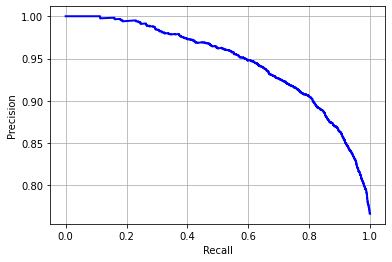

In [13]:
# PR curve

def plotPrecisionVSRecall(precisions, recalls, label=None):
    plt.plot(recalls, precisions, "b-", linewidth=2, label=label)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    
plotPrecisionVSRecall(precisions, recalls)
plt.show()

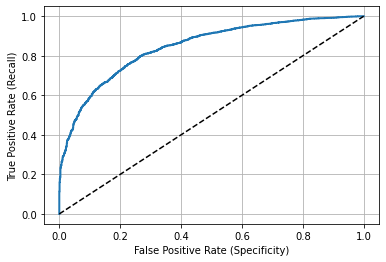

In [14]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, sgd_scores)

def plotROCCurve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel("False Positive Rate (Specificity)")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid(True)
    
plotROCCurve(fpr, tpr)

In [15]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=24)

In [16]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84769929, 0.83927414, 0.84565499])

In [17]:
# Equivalent of sgd_scores, except with predict proba method, and needs to select 2nd column

forest_probas = cross_val_predict(forest_clf, X_train, y_train, cv=3, method='predict_proba')
forest_score = forest_probas[:, 1]

In [18]:
forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [19]:
from sklearn.metrics import f1_score

print(f1_score(y_train, sgd_pred))
print(f1_score(y_train, forest_pred))

0.8812760055478501
0.9031564808596372


In [20]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([an_image])

array([1])

In [21]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

neighbor_clf = KNeighborsClassifier()

In [ ]:
f1_score(y_train, knn_pred, average='macro')

In [ ]:
knn_scores = cross_val_predict(knn_clf, X_train, y_train, cv=3, scoring='decision function')

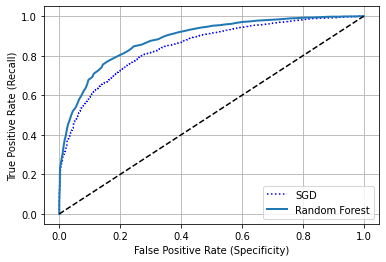

In [24]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, forest_score)

plt.plot(fpr, tpr, "b:", label="SGD")
plotROCCurve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")

In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, knn_scores)

plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot(fpr_forest, tpr_forest, 'g:', label='Random Forest')
plotROCCurve(fpr_knn, tpr_knn, label="KNN")
plt.legend(loc='lower right')

In [ ]:
# Try SVM as well

In [ ]:
# Saving the model: Pickle
import pickle

# approach 1
# with open('model_pickle', 'wb') as file:
#     pickle.dump(forest_clf, file)
    
pickle.dump(forest_clf, open('forest_clf.pkl', 'wb'))

In [ ]:
# Joblib method
from sklearn.externals import joblib

joblib.dump(model, 'model_joblib')